# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [25]:
df = pd.read_csv("Dataset_Inisiasi.csv")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerAge      2512 non-null   float64
 1   TransactionType  2512 non-null   int64  
 2   Cluster_KMeans   2512 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 59.0 KB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [27]:
X = df.drop(columns=["Cluster_KMeans"])
y = df["Cluster_KMeans"]

# Split data untuk training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [28]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi dan latih model Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Algoritma Naive Bayes digunakan untuk mengklasifikasikan data berdasarkan hasil clustering yang telah dilakukan sebelumnya. Model ini bekerja dengan menghitung probabilitas setiap kelas berdasarkan distribusi fitur yang ada, dengan asumsi bahwa setiap fitur bersifat independen. Dalam kasus ini, digunakan Gaussian Naive Bayes, yang mengasumsikan bahwa fitur memiliki distribusi normal. Algoritma ini cocok untuk dataset ini karena cepat dalam melakukan prediksi dan mampu menangani data dengan berbagai variasi fitur.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [29]:
y_pred = nb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Evaluasi Model:")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Evaluasi Model:
Accuracy: 0.9801
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       199
           1       1.00      0.94      0.97        49
           2       1.00      0.96      0.98       192
           3       0.95      1.00      0.98        63

    accuracy                           0.98       503
   macro avg       0.98      0.98      0.98       503
weighted avg       0.98      0.98      0.98       503



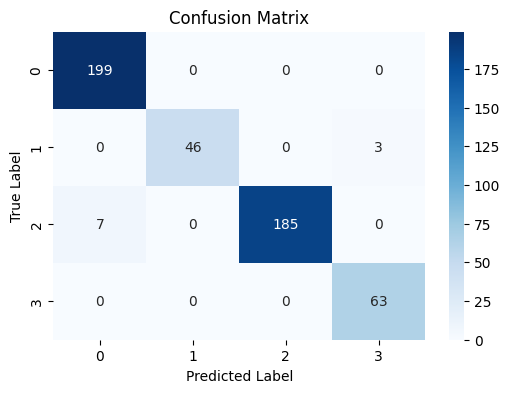

In [30]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Model yang digunakan dalam klasifikasi ini adalah Naive Bayes, yang bekerja dengan prinsip probabilistik berdasarkan Teorema Bayes. Dengan menggunakan dataset yang telah diproses, model mencapai akurasi sebesar 98,01%, yang menunjukkan performa yang cukup baik. Berdasarkan classification report, precision, recall, dan F1-score pada masing-masing kelas menunjukkan hasil yang seimbang, menandakan bahwa model dapat mengenali pola data dengan baik. Confusion matrix juga menunjukkan bahwa model mampu mengklasifikasikan sebagian besar data dengan benar, meskipun masih terdapat sedikit kesalahan prediksi terutama pada kelas 1 dan 2.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [31]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [32]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Model Naive Bayes yang digunakan memiliki performa yang cukup baik dengan akurasi sebesar 98,01%. Namun, terdapat beberapa kelemahan yang perlu diperhatikan, terutama pada precision dan recall untuk kelas tertentu, seperti kelas 1 dan 2, yang sedikit lebih rendah dibandingkan kelas lainnya. Berdasarkan confusion matrix, terlihat bahwa beberapa sampel dari kelas 2 diklasifikasikan sebagai kelas 0, dan beberapa sampel dari kelas 1 diklasifikasikan sebagai kelas 3. Meskipun akurasi tinggi, model ini berpotensi mengalami sedikit underfitting karena asumsi independensi antar fitur yang mungkin tidak sepenuhnya sesuai dengan karakteristik data yang digunakan. Untuk meningkatkan performa model, hal yang dapat dilakukan adalah menambah jumlah data agar model memiliki representasi yang lebih baik untuk setiap kelas, melakukan eksplorasi lebih lanjut terhadap fitur yang digunakan melalui feature engineering, serta mencoba algoritma lain seperti Random Forest atau Gradient Boosting yang lebih mampu menangkap pola kompleks. Selain itu, optimasi model dengan hyperparameter tuning juga dapat meningkatkan akurasi dan keseimbangan metrik evaluasi.